# Packages

In [102]:
import pandas as pd
import numpy as np

# Data Processing

### Bollywood Data

###  Song Data

In [103]:

bolly_df=pd.read_csv('Bollywood Data.txt')


In [104]:
bolly_df=bolly_df.head(50)
bolly_df.drop(bolly_df.columns[[0]],axis=1, inplace=True)
bolly_df.head()

,Song Title,Artist 1,Artist 2,Mood,Genre,Year,People Liked,Popularity
0,Tum Hi Ho,Arijit Singh,NaN,Romantic,Pop,2013,3500000,9500000.0
1,Chaiyya Chaiyya,Sukhwinder Singh,NaN,Energetic,Folk,1998,4000000,9000000.0
2,Kal Ho Naa Ho,Sonu Nigam,NaN,Sad,Pop,2003,2800000,8800000.0
3,Jai Ho,A. R. Rahman,NaN,Energetic,Fusion,2008,3200000,9200000.0
4,Tujh Mein Rab Dikhta Hai,Shreya Ghoshal,NaN,Romantic,Classical,2008,2500000,8700000.0


In [105]:
bolly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Song Title    50 non-null     object 
 1   Artist 1      50 non-null     object 
 2   Artist 2      21 non-null     object 
 3   Mood          50 non-null     object 
 4   Genre         50 non-null     object 
 5   Year          50 non-null     int64  
 6   People Liked  50 non-null     int64  
 7   Popularity    50 non-null     float64
dtypes: float64(1), int64(2), object(5)
memory usage: 3.3+ KB


# Inclusion of Rating

##  Popularity/People Liked 

In [106]:
bolly_df['Rating']=bolly_df['Popularity']/bolly_df['People Liked']


In [107]:
bolly_df.head()

,Song Title,Artist 1,Artist 2,Mood,Genre,Year,People Liked,Popularity,Rating
0,Tum Hi Ho,Arijit Singh,NaN,Romantic,Pop,2013,3500000,9500000.0,2.714286
1,Chaiyya Chaiyya,Sukhwinder Singh,NaN,Energetic,Folk,1998,4000000,9000000.0,2.250000
2,Kal Ho Naa Ho,Sonu Nigam,NaN,Sad,Pop,2003,2800000,8800000.0,3.142857
3,Jai Ho,A. R. Rahman,NaN,Energetic,Fusion,2008,3200000,9200000.0,2.875000
4,Tujh Mein Rab Dikhta Hai,Shreya Ghoshal,NaN,Romantic,Classical,2008,2500000,8700000.0,3.480000


# EDA

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [109]:
bolly_df.groupby('Song Title')['People Liked'].mean().sort_values(ascending=False).head()

Song Title
Pachtaoge             4200000.0
Chaiyya Chaiyya       4000000.0
Channa Mereya         4000000.0
Zingaat               3800000.0
Ae Dil Hai Mushkil    3800000.0
Name: People Liked, dtype: float64

In [110]:
rating=pd.DataFrame(bolly_df.groupby('Song Title')['Rating'].mean())
rating.head()

,Rating
Song Title,
Aaj Kal Tere Mere Pyar Ke,3.148148
Aankhon Mein Teri,3.269231
Ae Dil Hai Mushkil,2.447368
Afreen Afreen,2.647059
Agar Tum Saath Ho,2.647059


In [111]:
bolly_df.groupby('Song Title')['People Liked'].count().sort_values(ascending=False).head()

Song Title
Aaj Kal Tere Mere Pyar Ke      1
Sun Saathiya                   1
Pachtaoge                      1
Pal Pal Dil Ke Paas            1
Palat - Tera Hero Idhar Hai    1
Name: People Liked, dtype: int64

<Axes: >

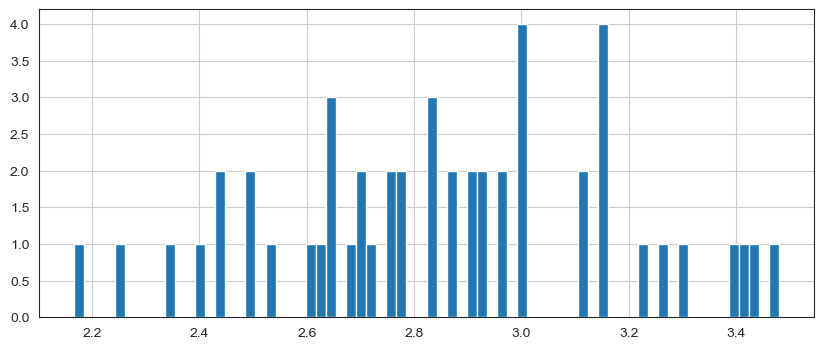

In [112]:
plt.figure(figsize=(10,4))
rating['Rating'].hist(bins=70)

# Emotion Detection


In [113]:
import pandas as pd
import numpy as np

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
import neattext.functions as nfx

In [116]:
df=pd.read_csv('emotion_dataset.csv')

In [117]:

df.head()



,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [118]:
df.shape

(34792, 2)

In [119]:
df.dtypes

Emotion    object
Text       object
dtype: object

In [120]:
df.isnull()

,Emotion,Text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
34787,False,False
34788,False,False
34789,False,False
34790,False,False


In [121]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [206]:
df['Emotion'].value_counts().plot(kind='bar')
for i in range(len(df['Emotion'])):
    if(df['Emotion'][i]=='fear'):
        df['Emotion'][i]='sadness'

KeyError: 'Emotion'

<Axes: xlabel='Emotion', ylabel='count'>

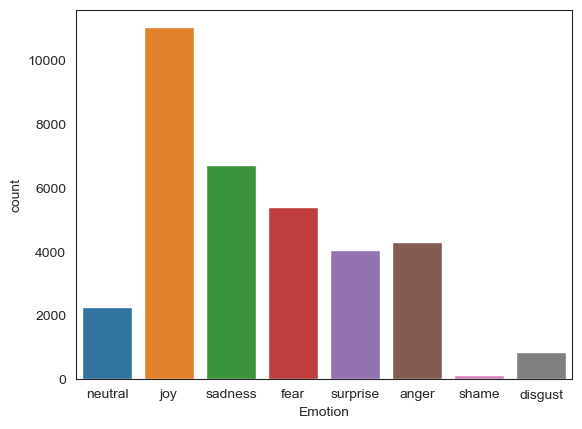

In [123]:
sns.countplot(x='Emotion',data=df)

##  Sentiment Analysis

In [124]:
from textblob import TextBlob

In [125]:
def getSentiment(text):
    blob=TextBlob(text)
    sentiment=blob.sentiment.polarity
    if sentiment > 0:
        result='Positive'
    elif sentiment < 0:
        result='Negative'
    else:
        result = 'Neutral'
    return result

In [126]:
getSentiment("i love coding")

'Positive'

In [127]:
df['Sentiment']=df['Text'].apply(getSentiment)

In [128]:
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [129]:
# Compare Emotion vs Sentiment

In [130]:
df.groupby(['Emotion','Sentiment']).size()


Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

<Axes: xlabel='Emotion,Sentiment'>

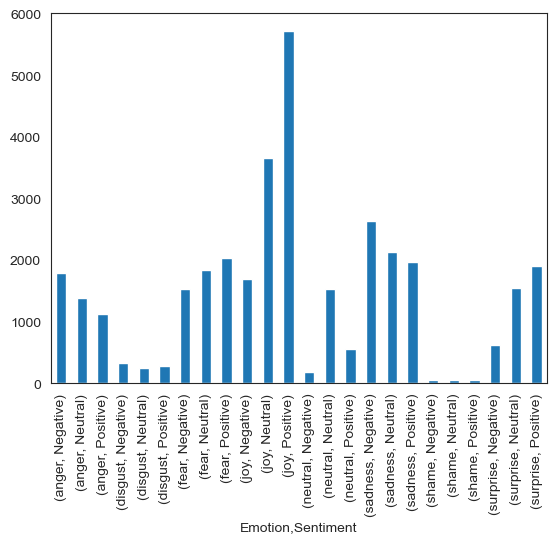

In [131]:
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

C:\Users\sreev\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


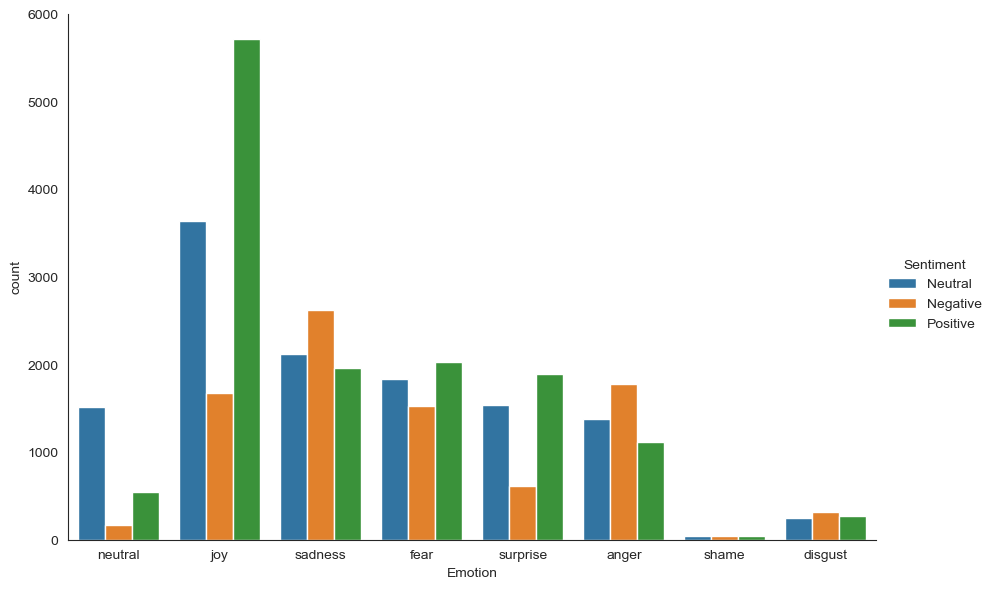

In [132]:
sns.catplot(x='Emotion',hue='Sentiment',data=df,kind='count',height=6,aspect=1.5)


In [133]:
df['Clean_text']=df['Text'].apply(nfx.remove_stopwords)
df['Clean_text']=df['Clean_text'].apply(nfx.remove_punctuations)
df['Clean_text']=df['Clean_text'].apply(nfx.remove_userhandles)


In [134]:
df[['Text','Clean_text']]

,Text,Clean_text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [135]:
df['Clean_text']

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_text, Length: 34792, dtype: object

In [136]:
df['Emotion']

0         neutral
1             joy
2         sadness
3             joy
4             joy
           ...   
34787    surprise
34788         joy
34789       anger
34790        fear
34791     sadness
Name: Emotion, Length: 34792, dtype: object

In [137]:
from collections import Counter

In [138]:
def extract_keywords(text,num=50):
    tokens=[tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [139]:
Emotion_list=df['Emotion'].unique().tolist()

In [140]:
Emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [141]:
joy_list=df[df['Emotion']=='joy']['Clean_text']

In [142]:
joy_docx=' '.join(joy_list)
joy_docx

'Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness    ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy : hopes prayers beloved son come fruition  feeling fail french #fuckfrench GoodLet   fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah  ’ ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome    brings  Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life  Leopold truly happy : hopes prayers beloved son come fruition  Class jamming

In [143]:
keyword_joy= extract_keywords(joy_docx)
keyword_joy

{'day': 729,
 'amp': 678,
 'time': 602,
 'Im': 555,
 'work': 509,
 'like': 476,
 'today': 471,
 'tomorrow': 467,
 'Christmas': 453,
 'love': 393,
 'happy': 368,
 'good': 345,
 'night': 332,
 'got': 328,
 ':)': 311,
 'going': 304,
 'home': 302,
 'school': 297,
 'morning': 288,
 '2': 262,
 'joy': 257,
 'life': 251,
 'hours': 251,
 'week': 231,
 'feel': 227,
 'year': 225,
 'days': 208,
 'tonight': 205,
 'long': 204,
 'people': 201,
 'me': 196,
 'great': 194,
 'sleep': 185,
 'new': 181,
 'family': 181,
 's': 180,
 'God': 177,
 'know': 177,
 'hour': 172,
 'friend': 169,
 'felt': 167,
 'cant': 165,
 'it': 162,
 'feeling': 159,
 'RT': 159,
 'friends': 155,
 'think': 148,
 'excited': 145,
 'right': 142,
 'class': 141}

In [144]:
def plot_most_common_words(mydict,emotion_name):
    df_01= pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    sns.barplot(x='token',y='count',data=df_01)
    plt.title('Plot of {} Most Common Words'.format(emotion_name))
    plt.xticks(rotation=45)
    plt.show()

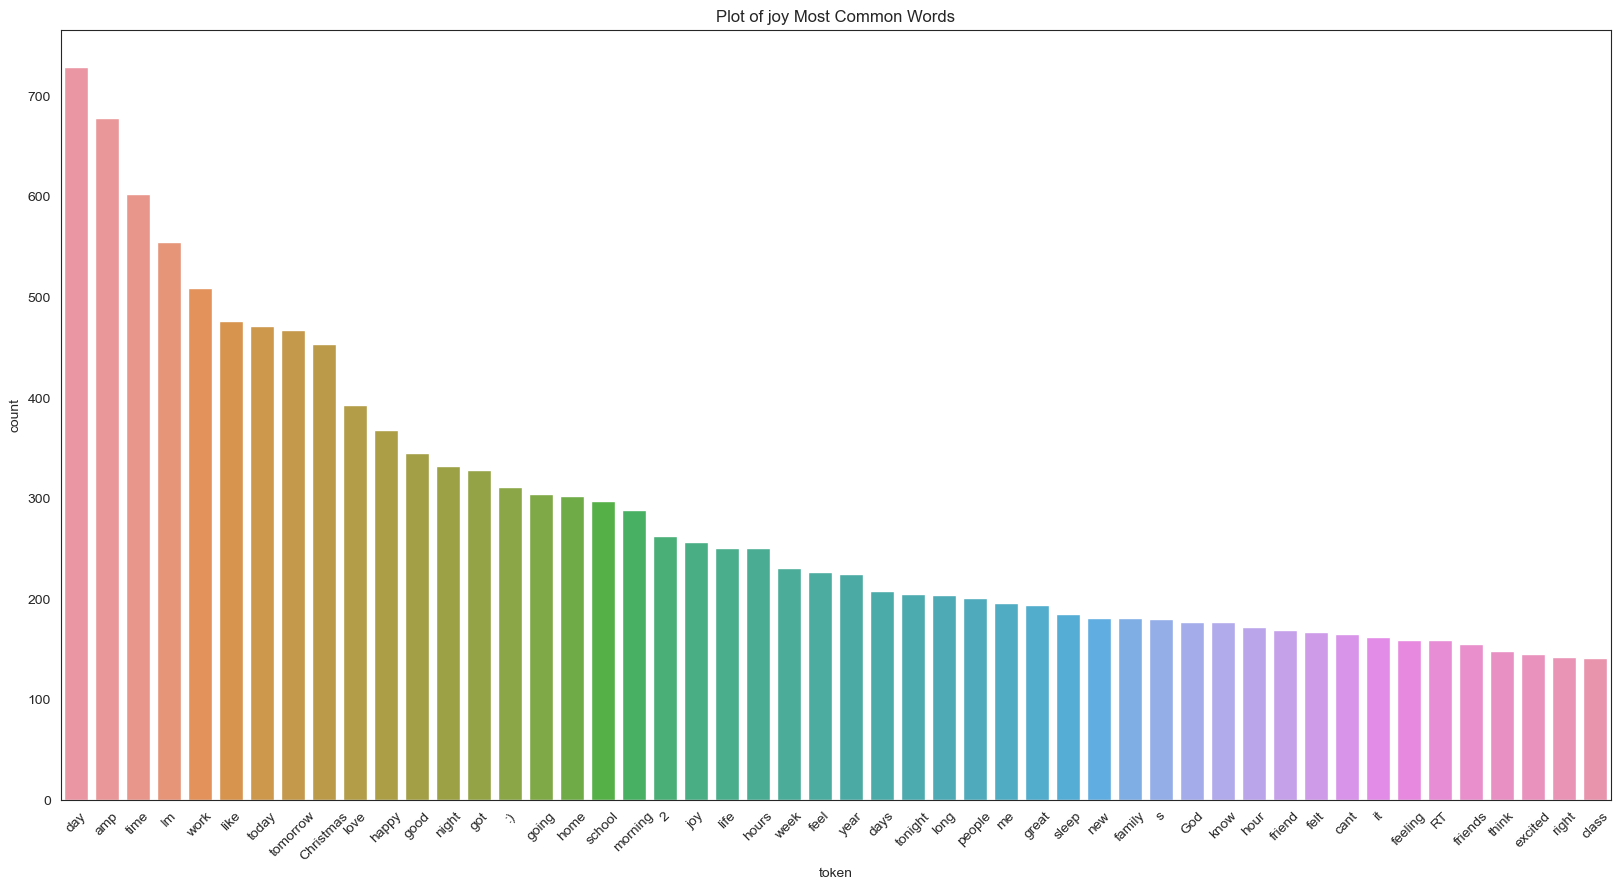

In [145]:
plot_most_common_words(keyword_joy,'joy')

In [146]:
surprise_list=df[df['Emotion']=='surprise']['Clean_text'].tolist()

surprise_docx = ' '.join(surprise_list)

keyword_surprise = extract_keywords(surprise_docx)
keyword_surprise

{'en': 299,
 'een': 294,
 'de': 251,
 'Im': 227,
 ':)': 201,
 'know': 165,
 'home': 160,
 'van': 153,
 'today': 150,
 'day': 143,
 'ik': 137,
 'nog': 126,
 'love': 126,
 'got': 126,
 'met': 125,
 'amp': 124,
 'RT': 124,
 'time': 120,
 'like': 117,
 'voor': 116,
 'going': 116,
 'surprise': 114,
 'je': 110,
 'tomorrow': 105,
 'good': 101,
 'birthday': 101,
 'wait': 97,
 'het': 96,
 'night': 93,
 'actually': 93,
 'coming': 92,
 'lol': 89,
 'dan': 87,
 'Christmas': 84,
 'mom': 83,
 'u': 82,
 'think': 80,
 'friends': 79,
 'op': 76,
 'la': 74,
 ')': 74,
 '5': 73,
 'new': 72,
 'thought': 70,
 'best': 70,
 'special': 69,
 'school': 69,
 '2': 69,
 'work': 68,
 'people': 68}

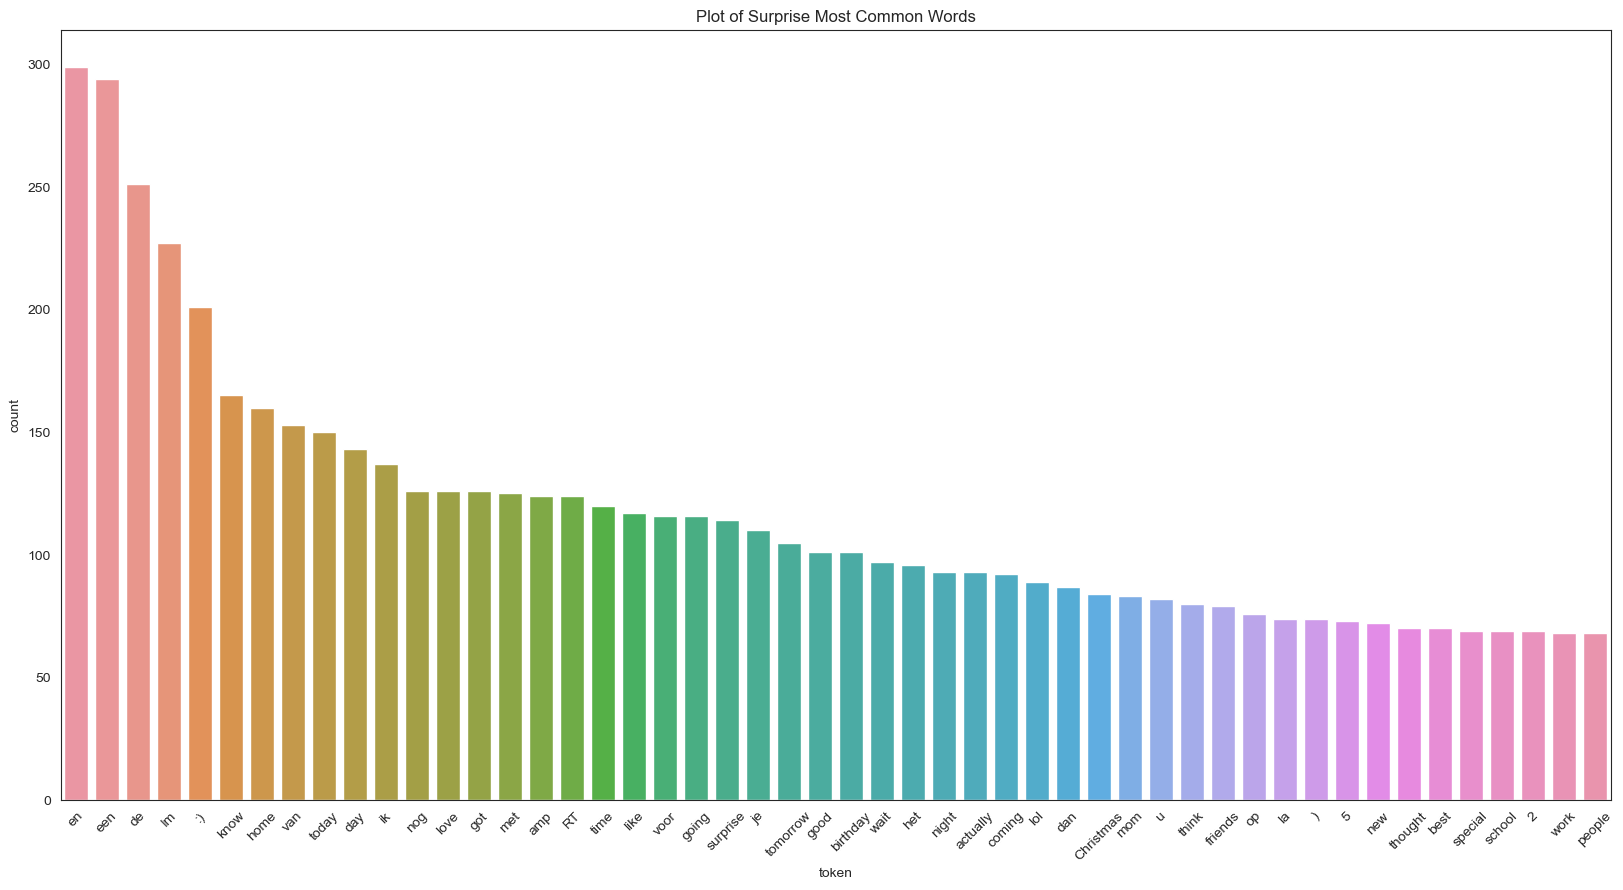

In [147]:
plot_most_common_words(keyword_surprise,'Surprise')

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.metrics import accuracy_score,confusion_matrix,confusion_matrix

from sklearn.model_selection import train_test_split

In [149]:
Xfeatures=df['Clean_text']
ylabel=df['Emotion']

In [150]:
Xfeatures = Xfeatures.dropna()
Xfeatures

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_text, Length: 34792, dtype: object

In [151]:
cv=CountVectorizer()
X=cv.fit_transform(Xfeatures)

In [152]:
cv.get_feature_names_out()

array(['00', '000', '000ème', ..., 'ღƪ', 'ℕoíʀ', 'ㄒʜℰℳℰ'], dtype=object)

In [153]:
X_train,X_test,y_train,y_test=train_test_split(X,ylabel,test_size=0.3,random_state=42)

In [154]:
nv_model=MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [155]:
nv_model.score(X_test,y_test)

0.5642843456600881

In [156]:
y_pred_for_nv=nv_model.predict(X_test)

In [157]:
y_pred_for_nv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

In [198]:
sample=["Riding is boring because all my friends cant travell together "]

In [199]:
vect=cv.transform(sample).toarray()

In [200]:
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [201]:
nv_model.predict_proba(vect)

array([[1.26324177e-02, 9.27404551e-06, 5.93766275e-03, 5.07123659e-01,
        4.12503614e-06, 3.82489894e-01, 1.49097449e-08, 9.18029526e-02]])

In [202]:
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [203]:
np.max(nv_model.predict_proba(vect))

0.5071236586114878

In [204]:
def predict_emotion(text,model):
    my_vect=cv.transform(text).toarray()
    prediction=model.predict(my_vect)
    pred_proba=model.predict_proba(my_vect)
    pred_percentage_for_all=dict(zip(model.classes_,pred_proba[0]))
    print('prediction:{}, prediction Score{}'.format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

In [205]:
predict_emotion(sample,nv_model)

prediction:joy, prediction Score0.5071236586114878


{'anger': 0.012632417709469384,
 'disgust': 9.274045514808656e-06,
 'fear': 0.005937662745884574,
 'joy': 0.5071236586114878,
 'neutral': 4.125036143940125e-06,
 'sadness': 0.38248989435576064,
 'shame': 1.4909744932316854e-08,
 'surprise': 0.09180295258599763}

In [189]:
import random
import re
from collections import defaultdict
from textblob import TextBlob
from rake_nltk import Rake

class InteractiveConversationalBot:
    def __init__(self):
        self.memory = defaultdict(list)  # To remember conversation context
        self.user_name = None
        self.default_responses = [
            "Could you tell me more about that?",
            "That sounds interesting! What else?",
            "And then what happened?",
            "Do you often think about this?",
            "How does that make you feel?"
        ]
        self.engagement_questions = [
            "What do you think about this?",
            "How does this make you feel?",
            "Can you share more details?",
            "What are your thoughts on this?"
        ]
    
    def extract_keywords(self, text):
        # Basic keyword extraction: remove stopwords and simple text processing
        text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and lower the case
        # Initialize RAKE
        rake = Rake()


        # Extract keywords
        rake.extract_keywords_from_text(text)
        keywords = rake.get_ranked_phrases()
        return keywords
    
    def generate_followup_question(self, keyword):
        # Simple dynamic question generation based on keywords
        questions = [
            
            f"What do you think about {keyword}?",
            f"How do you feel about {keyword}?",
            f"Can you elaborate more on {keyword}?",
            f"Do you often deal with {keyword}?"
        ]
        return random.choice(questions)
    
    def analyze_sentiment(self, text):
        # Analyze the sentiment of the user input using TextBlob
        blob = TextBlob(text)
        return blob.sentiment.polarity
    
    def personalize_response(self, text):
        # Adjust responses based on sentiment
        sentiment = self.analyze_sentiment(text)
        if sentiment > 0.5:
            return "I'm glad to hear that!"
        elif sentiment < -0.5:
            return "I'm sorry to hear that. Do you want to talk more about it?"
        else:
            return random.choice(self.engagement_questions)
    
    def get_response(self, user_input):
        if not self.user_name:
            self.user_name = user_input  # Capture the user's name
            return f"Nice to meet you, {self.user_name}! What would you like to talk about today?"
        
        keywords = self.extract_keywords(user_input)
        
        if keywords:
            keyword = random.choice(keywords)
            self.memory[keyword].append(user_input)
            followup = self.generate_followup_question(keyword)
            return f"{self.personalize_response(user_input)} {followup}"
        
        return random.choice(self.default_responses)

    def chat(self):
        print("Bot: Hi there! What's your name?")
        while True:
            user_input = input("User: ")
            if user_input.lower() in ["quit", "exit", "bye"]:
                print(f"Bot: Goodbye, {self.user_name}! Have a great day!")
                break
            response = self.get_response(user_input)
            
            print(f"Bot: {response}")
            predict_emotion([user_input],nv_model)

# Start the conversational bot
bot = InteractiveConversationalBot()
bot.chat()


Bot: Hi there! What's your name?
User: Sree
Bot: Nice to meet you, Sree! What would you like to talk about today?
prediction:joy, prediction Score0.3175659029317566
User: i fell from bike while i was riding to home
Bot: What are your thoughts on this? What do you think about riding?
prediction:fear, prediction Score0.9085864825876476
User: Riding is boring
Bot: I'm sorry to hear that. Do you want to talk more about it? How do you feel about boring?
prediction:joy, prediction Score0.3834266444330876


KeyboardInterrupt: Interrupted by user

In [169]:
df=pd.read_csv('Content_Based_Filtering_T.csv')

In [170]:
df.head()

,Song ID,Song Title,Movie Name,Year,Artists,Overview,Mood,Genre,Crew
0,1,Rowdy Baby,Maari 2,2018,"['Dhanush', 'Dhee']",A high-energy dance number with a blend of fol...,Energetic,Folk,"['Director: Balaji Mohan', 'Music: Yuvan Shank..."
1,2,Vaathi Coming,Master,2021,"['Anirudh Ravichander', 'G.V. Prakash Kumar']",A fun and energetic kuthu song with a catchy r...,Energetic,Folk,"['Director: Lokesh Kanagaraj', 'Music: Anirudh..."
2,3,Enjoy Enjaami,Independent,2021,"['Dhee', 'Arivu']",A soulful track highlighting the beauty of nat...,Chill,Indie,"['Producer: Santhosh Narayanan', 'Lyricist: Ar..."
3,4,Why This Kolaveri Di,3,2011,['Dhanush'],A quirky song that became an internet sensatio...,Fun,Pop,"['Director: Aishwarya R. Dhanush', 'Music: Ani..."
4,5,Aalaporan Thamizhan,Mersal,2017,['Karthik'],A patriotic song celebrating Tamil culture and...,Patriotic,Folk,"['Director: Atlee', 'Music: A. R. Rahman']"


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Song ID     36 non-null     int64 
 1   Song Title  36 non-null     object
 2   Movie Name  36 non-null     object
 3   Year        36 non-null     int64 
 4   Artists     36 non-null     object
 5   Overview    36 non-null     object
 6   Mood        36 non-null     object
 7   Genre       36 non-null     object
 8   Crew        36 non-null     object
dtypes: int64(2), object(7)
memory usage: 2.7+ KB


In [172]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [173]:
tfv=TfidfVectorizer(min_df=3,max_features=None,strip_accents='unicode',
                   analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1,3),
                   stop_words='english')
df['Overview']=df['Overview'].fillna('')

In [174]:
tfv_matrix=tfv.fit_transform(df['Overview'])

In [175]:
tfv_matrix

<36x19 sparse matrix of type '<class 'numpy.float64'>'
	with 107 stored elements in Compressed Sparse Row format>

In [176]:
tfv_matrix.shape

(36, 19)

In [177]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig=sigmoid_kernel(tfv_matrix,tfv_matrix)

In [178]:
indices=pd.Series(df.index,index=df['Song Title']).drop_duplicates()

In [179]:
indices

Song Title
Rowdy Baby               0
Vaathi Coming            1
Enjoy Enjaami            2
Why This Kolaveri Di     3
Aalaporan Thamizhan      4
Vaseegara                5
Marana Mass              6
Kannamma                 7
Dippam Dappam            8
Anbe Anbe                9
Otha Sollaala           10
Mukkala Mukkabala       11
Maya Nadhi              12
Kannaana Kanne          13
Kaatru Veliyidai        14
Kalyana Vayasu          15
Danga Maari             16
Aathi                   17
Selfie Pulla            18
Aathi Enna Nee          19
Thani Oruvan            20
Oru Naal Koothu         21
Vennilave               22
Mental Manadhil         23
Kutti Story             24
Pudhu Vellai Mazhai     25
Unnai Kaanadhu Naan     26
Adiye                   27
Uyire                   28
Kadhalan                29
Appadi Podu             30
Usure Pogudhey          31
Nenjukkul Peidhidum     32
Saarattu Vandiyila      33
Kannamma                34
Maduraikku Pogathadi    35
dtype: int64

In [180]:
def give_rec(title,sig=sig):
    idx=indices[title]
    
    sig_scores=list(enumerate(sig[idx]))
    
    sig_scores=sorted(sig_scores,key=lambda x:x[1],reverse=True)
    
    sig_scores=sig_scores[1:11]
    
    movies_indices=[i[0] for i in sig_scores]
    
    return df['Song Title'].iloc[movies_indices]

In [209]:
give_rec('Vaathi Coming')

18            Selfie Pulla
23         Mental Manadhil
3     Why This Kolaveri Di
15          Kalyana Vayasu
24             Kutti Story
4      Aalaporan Thamizhan
35    Maduraikku Pogathadi
14        Kaatru Veliyidai
21         Oru Naal Koothu
27                   Adiye
Name: Song Title, dtype: object

## Collaborative Filtering

In [182]:
user=pd.read_csv('Collabrative Filtering T.csv')

In [183]:
user

,User ID,Rowdy Baby,Vaathi Coming,Enjoy Enjaami,Why This Kolaveri Di,Aalaporan Thamizhan,Vaseegara,Marana Mass,Kannamma,Dippam Dappam,...,Adiye,Uyire,Kadhalan,Appadi Podu,Usure Pogudhey,Nenjukkul Peidhidum,Saarattu Vandiyila,Kannamma.1,Maduraikku Pogathadi,Dhevathaiyai
0,User1,2,1,4,1,1,1,3,5,3,...,4,3,5,4,1,2,4,1,4,4
1,User2,3,1,5,1,2,4,4,4,5,...,1,5,3,5,4,5,5,3,3,4
2,User3,3,1,2,5,4,3,5,3,2,...,5,5,3,3,5,5,1,1,3,5
3,User4,1,2,3,3,1,4,5,3,4,...,3,3,3,3,4,3,5,3,4,2
4,User5,3,2,1,2,2,2,3,2,3,...,1,5,1,2,4,4,1,3,2,4
5,User6,3,5,5,5,4,5,2,3,4,...,3,5,2,1,1,2,5,4,4,5
6,User7,5,5,4,1,1,5,5,1,2,...,2,4,1,4,1,4,4,5,1,3
7,User8,4,1,3,4,2,5,1,3,5,...,1,1,5,5,4,3,5,3,5,5
8,User9,2,1,4,5,5,3,2,2,5,...,4,4,4,1,5,3,2,3,5,2
9,User10,5,4,1,2,4,1,4,1,2,...,4,5,5,2,1,1,4,2,1,4


In [210]:
user_rating=user['Mukkala Mukkabala']
user_rating.head()

0    1
1    2
2    1
3    1
4    1
Name: Mukkala Mukkabala, dtype: int64

In [211]:
similar=user.corrwith(user_rating)


C:\Users\sreev\AppData\Local\Temp\ipykernel_14176\4065006558.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  similar=user.corrwith(user_rating)


In [186]:
corr=pd.DataFrame(similar,columns=['Correlation'])
corr.dropna(inplace=True)
sorted_corr=corr.sort_values(by=['Correlation'],ascending=False)
sorted_corr

,Correlation
Mukkala Mukkabala,1.000000
Kaatru Veliyidai,0.501965
Maya Nadhi,0.396378
Aalaporan Thamizhan,0.296121
Otha Sollaala,0.224721
Dhevathaiyai,0.177220
Why This Kolaveri Di,0.169020
Rowdy Baby,0.164845
Aathi,0.135663
Dippam Dappam,0.113097


In [187]:
for info in df['Overview']:
    predict_emotion(info,nv_model)
    

ValueError: Iterable over raw text documents expected, string object received.

main.py->
chatbot
cfcf

2.chatbot.py
3.coll fil

